#### Task 1
For each review included in the dataset, use `spacytextblob` and its inherent document-level scores to get the polarity score of the text. Create a violinplot with the x-axis being individual reviews' star rating, and the y-axis being the calculated polarity scores. Interpret the results.

In [1]:
import os
import json
import spacy
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cosine
nlp = spacy.load('en_core_web_sm')
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

os.chdir('/Users/heather/Desktop/compsoc/data')

In [2]:
review_ids = []
ratings = []
polarity_scores = []
subjective_scores = []
subjective_phrases_by_doc = []
review_list = []

with open('yelp_academic_dataset_review_Nov2022_small.jsonl') as f:
    line_index = 0
    for line in tqdm(f, total=10000):
        line_index += 1
        review_dict = json.loads(line)
        review_list.append(review_dict)

        review_id = review_dict['review_id']
        review = review_dict['text']
        rating = review_dict['stars']

        review_doc = nlp(review)
        subjective_phrases_in_doc = []
        polarity_score = 0
        subjective_score = 0
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
            polarity_score += assess_tuple[1]
            subjective_score += assess_tuple[2]

        review_ids.append(review_id)
        ratings.append(rating)
        polarity_scores.append(polarity_score)
        subjective_scores.append(subjective_score)
        subjective_phrases_by_doc.append(subjective_phrases_in_doc)

100%|██████████| 10000/10000 [04:48<00:00, 34.62it/s]


In [3]:
review_texts = []

for i in tqdm(range(len(review_list))):
    review_texts.append(review_list[i]["text"])

100%|██████████| 10000/10000 [00:00<00:00, 452733.47it/s]


In [4]:
yelp_df = pd.DataFrame(columns=['review_id', 'rating', 'polarity_score', 'subjective_score', 'subjective_phrases'])
yelp_df['review_id'] = review_ids
yelp_df['rating'] = ratings
yelp_df['polarity_score'] = polarity_scores
yelp_df['subjective_score'] = subjective_scores
yelp_df['review_text'] = review_texts
yelp_df['subjective_phrases'] = [' '.join(item) for item in subjective_phrases_by_doc]
print(yelp_df)

                   review_id  rating  polarity_score  subjective_score  \
0     KU_O5udG6zpxOg-VcAEodg     3.0        1.023333          5.148333   
1     BiTunyQ73aT9WBnpR9DZGw     5.0        4.425000          6.283333   
2     saUsX_uimxRlCVr67Z4Jig     3.0        1.539286          5.745238   
3     AqPFMleE6RsU23_auESxiA     5.0        2.420455          5.704545   
4     Sx8TMOWLNuJBWer-0pcmoA     4.0        5.613571          6.872857   
...                      ...     ...             ...               ...   
9995  ZcBtCA9jGhLfakf1jJ2BAg     5.0        1.800000          1.875000   
9996  UIkEO-10J6Y99IhRqUflvg     5.0        0.600000          0.900000   
9997  S-NQM3Axcg8JS3MXHUIvyw     5.0        1.097727          6.900758   
9998  ME79YrEhm2xe4IQy_0zkGw     5.0        2.812500          4.800000   
9999  05oKtleZ-JFGD6qt47VQcg     2.0        1.319048          6.002381   

                                     subjective_phrases  \
0     aware multiple ! other bad good very long very

<AxesSubplot:xlabel='rating', ylabel='polarity_score'>

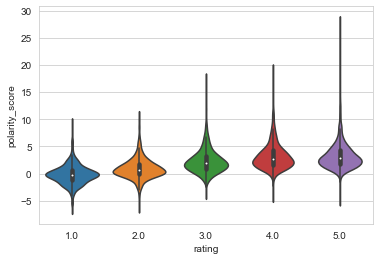

In [5]:
sns.violinplot(data=yelp_df, x="rating", y="polarity_score")

**Task 1 Conclusion**
The violin plot shows that people who give higher ratings tend to have positive and higher polarity scores, meaning that they tend to use positive words in their ratings. For people with lower ratings, they tend to have lower and negative polarity scores, meaning that they often show negativity in their reviews.

#### Task 2
For each review included in the dataset, extract the subjective phrases in the text using  `spacytextblob` and its `sentiment_assessments.assessments` feature. Then, for each review whose review_id is in the following `target_review_ids` list, find the top 3 reviews that are most similar to it in terms of their subjective phrases.

target_review_ids = ["40thYphUgIfvJq17QCfTwA", "E9AB7V4z8xrt2uPF7T55FQ", "4PHFo_GRG4FEk1q4X7xQVQ", "4KpIldEM-tdnrJLqYzRfZQ", "PDHRlnEdkEcwATry4w71PQ", "meGaFP7yxQdjyABrYDVeoQ", "pgESDcC7eDx4z_epqon4_Q", "qeSxL-POvGLZD6aQ5O9kvw"]

Answer the following questions:

For each of the target reviews, what are the top 3 reviews that are most similar to it in terms of their subjective phrases?
What is the rating of each of the target reviews? What about the rating of their top 3 most similar reviews? Are they correlated? Interpret the results.
Requirement:

Use either spacy's word vector or the one-hot encoding method to get document-level word embeddings for the review text, which should be based only on the subjective phrases.
Use these word embeddings and the cosine similarity metric to find similar texts.

In [6]:
#Create tokenized vocabulary list for all reviews
vocab_dict = {}
for i in tqdm(range(len(yelp_df))):
    reviews = yelp_df.loc[i, 'subjective_phrases']
    for token in nlp(reviews):
        if token.is_alpha:
            vocab_dict[token.lemma_.lower()] = vocab_dict.get(token.lemma_.lower(), 0) + 1

vocabulary_list = list(vocab_dict.keys())
print(vocabulary_list)

100%|██████████| 10000/10000 [01:29<00:00, 111.90it/s]

['aware', 'multiple', 'other', 'bad', 'good', 'very', 'long', 'young', 'usually', 'pleasant', 'many', 'spend', 'nice', 'clean', 'amazing', 'top', 'fit', 'easy', 'advanced', 'evident', 'open', 'smile', 'large', 'chicken', 'fresh', 'mexican', 'friendly', 'attentive', 'casual', 'next', 'wow', 'different', 'delicious', 'favorite', 'outside', 'new', 'glad', 'cute', 'great', 'beautiful', 'really', 'much', 'like', 'more', 'such', 'fun', 'limit', 'frequent', 'busy', 'half', 'full', 'fuck', 'back', 'love', 'perfect', 'interesting', 'enjoy', 'highly', 'actually', 'french', 'first', 'second', 'strange', 'not', 'terribly', 'hard', 'center', 'amazingly', 'perfectly', 'definitely', 'hide', 'pretty', 'white', 'down', 'dead', 'green', 'dirty', 'several', 'quiet', 'kind', 'surprised', 'lively', 'wonderful', 'confirm', 'able', 'simple', 'confirmed', 'leave', 'later', 'small', 'important', 'completely', 'instantly', 'happy', 'mixed', 'slow', 'ridiculous', 'exactly', 'wrong', 'warm', 'soft', 'succeed', 'f

In [7]:
#Get the target review ids indexes
target_review_ids = ['40thYphUgIfvJq17QCfTwA', 'E9AB7V4z8xrt2uPF7T55FQ', '4PHFo_GRG4FEk1q4X7xQVQ', '4KpIldEM-tdnrJLqYzRfZQ', 'PDHRlnEdkEcwATry4w71PQ', 'meGaFP7yxQdjyABrYDVeoQ', 'pgESDcC7eDx4z_epqon4_Q', 'qeSxL-POvGLZD6aQ5O9kvw']
target_yelp = yelp_df.loc[yelp_df['review_id'].isin(target_review_ids)].reset_index()
print(target_yelp)

   index               review_id  rating  polarity_score  subjective_score  \
0     32  40thYphUgIfvJq17QCfTwA     5.0        2.166667          3.350000   
1     39  E9AB7V4z8xrt2uPF7T55FQ     5.0        1.660000          2.490000   
2     66  4KpIldEM-tdnrJLqYzRfZQ     5.0        3.250000          5.550000   
3     73  PDHRlnEdkEcwATry4w71PQ     1.0       -0.864286          3.557143   
4     84  meGaFP7yxQdjyABrYDVeoQ     1.0       -0.233333          2.216667   
5     96  4PHFo_GRG4FEk1q4X7xQVQ     5.0        2.744697          8.354545   
6    347  qeSxL-POvGLZD6aQ5O9kvw     1.0        3.271825         32.216270   
7    424  pgESDcC7eDx4z_epqon4_Q     1.0        2.443333          4.696667   

                                  subjective_phrases  \
0                              great nice clean huge   
1                    amazing blank great highly busy   
2  only awesome ! freshly filled phenomenal sweet...   
3  plain unable back actual back awkwardly next b...   
4                

In [8]:
#Use the one-hot encoding
one_hot_encodings = []

for i in tqdm(range(len(yelp_df))):
    review_phrases = yelp_df.loc[i, 'subjective_phrases']
    token_indices = []

    for token in nlp(review_phrases):
        if token.is_alpha:
            token_index_in_vocab = vocabulary_list.index(token.lemma_.lower())
            token_indices.append(token_index_in_vocab)

    one_hot_encoding = np.zeros(len(vocabulary_list))
    for token_index in token_indices:
        one_hot_encoding[token_index] = 1

    one_hot_encodings.append(one_hot_encoding)

100%|██████████| 10000/10000 [01:32<00:00, 107.96it/s]


In [9]:
target_indices = list(target_yelp['index'])
target_encodings = []
rest_of_encodings = []

for i in range(len(yelp_df)):
    if i in target_indices:
        target_encodings.append(one_hot_encodings[i])
    else:
        rest_of_encodings.append(one_hot_encodings[i])

In [10]:
#Get all other reviews other than the targeted ones
other_yelp = yelp_df.loc[~yelp_df['review_id'].isin(target_review_ids)].reset_index()
print(other_yelp)

      index               review_id  rating  polarity_score  subjective_score  \
0         0  KU_O5udG6zpxOg-VcAEodg     3.0        1.023333          5.148333   
1         1  BiTunyQ73aT9WBnpR9DZGw     5.0        4.425000          6.283333   
2         2  saUsX_uimxRlCVr67Z4Jig     3.0        1.539286          5.745238   
3         3  AqPFMleE6RsU23_auESxiA     5.0        2.420455          5.704545   
4         4  Sx8TMOWLNuJBWer-0pcmoA     4.0        5.613571          6.872857   
...     ...                     ...     ...             ...               ...   
9987   9995  ZcBtCA9jGhLfakf1jJ2BAg     5.0        1.800000          1.875000   
9988   9996  UIkEO-10J6Y99IhRqUflvg     5.0        0.600000          0.900000   
9989   9997  S-NQM3Axcg8JS3MXHUIvyw     5.0        1.097727          6.900758   
9990   9998  ME79YrEhm2xe4IQy_0zkGw     5.0        2.812500          4.800000   
9991   9999  05oKtleZ-JFGD6qt47VQcg     2.0        1.319048          6.002381   

                           

In [11]:
#Calculate the similar values
target_1 = target_yelp.loc[0, 'review_text']

for m in range(len(target_encodings)):
    target_encoding = target_encodings[m]
    target_subjective_phrases = target_yelp.loc[m, 'subjective_phrases']
    target_ratings = target_yelp.loc[m, 'rating']
    similarity_values = []
    for i in range(len(rest_of_encodings)):
        similarity_value = 1 - cosine(target_encodings[m], rest_of_encodings[i])
        similarity_values.append(similarity_value)
    #write code on finding top 3

    print("targeted review subjective phrases: ", target_subjective_phrases)
    print("targeted review rating: ", target_ratings)

    similar_df = pd.DataFrame(columns=['review_id', 'subjective_phrases', 'rating', 'similarity_value_with_one_hot'])
    similar_df['review_id'] = other_yelp['review_id']
    similar_df['subjective_phrases'] = other_yelp['subjective_phrases']
    similar_df['rating'] = other_yelp['rating']
    similar_df['similarity_value_with_one_hot'] = similarity_values
    cleaned_similar = similar_df.loc[similar_df['subjective_phrases'].str.len() > 0]
    cleaned_similar = cleaned_similar.sort_values(by='similarity_value_with_one_hot', ascending=False)
    print(cleaned_similar.head(3), "\n")

/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  great nice clean huge
targeted review rating:  5.0
                   review_id                      subjective_phrases  rating  \
6801  rd-SxP6QX4G9bQMvf8h6Tw         great really nice super clean !     5.0   
8543  8u0OyLwKV4TCCglGkzIVVA            great little worth nice huge     4.0   
1041  pEwlvpFtLSoYok1i9F0Tew  nice really nice ! great awesome clean     4.0   

      similarity_value_with_one_hot  
6801                        0.67082  
8543                        0.67082  
1041                        0.67082   



/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  amazing blank great highly busy
targeted review rating:  5.0
                   review_id subjective_phrases  rating  \
4650  oa3MfdQvCz_BoU0UXVEDlw      great amazing     5.0   
4321  CaWB7BQPGXUli37SH9ks6g      great amazing     5.0   
8810  Q2SEocOLQXckCTxCCLpr8Q    great amazing !     5.0   

      similarity_value_with_one_hot  
4650                       0.632456  
4321                       0.632456  
8810                       0.632456   



/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  only awesome ! freshly filled phenomenal sweet perfect definitely
targeted review rating:  5.0
                   review_id  \
8264  AlPGnDHtaE2Kf8Kk6Dtbig   
7523  2QLcXtfzQCBv0j7gbI_T7g   
5024  X0A_5FDCK2mnGF5rHjQ3Ng   

                                     subjective_phrases  rating  \
8264                                 awesome phenomenal     4.0   
7523  best freshly artificial sour real best only la...     4.0   
5024     only delicious perfect very overall definitely     5.0   

      similarity_value_with_one_hot  
8264                       0.500000  
7523                       0.456435  
5024                       0.433013   



/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  plain unable back actual back awkwardly next back rudely back nice !
targeted review rating:  1.0
                   review_id                            subjective_phrases  \
9154  43Bc6ufpZZd5L7BcvcXDlg  pleasantly surprised nice next back ! good !   
292   NzvlG7XNjk5cKaCPtZa-eA               best clean nice grand next back   
3577  88BzbGaEJjnDmZp_jfq-GA                             great back next !   

      rating  similarity_value_with_one_hot  
9154     4.0                       0.433013  
292      5.0                       0.433013  
3577     5.0                       0.408248   



/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  seriously chicken good
targeted review rating:  1.0
                   review_id              subjective_phrases  rating  \
1037  WJeFbLeLzDyUIqHa2zlrMw  best chicken chicken good good     5.0   
9656  8_8KAZeevPUES_p20mo6GQ              best ! chicken top     5.0   
3252  MwViosFJI_DGKbKt-7qVFg     best original ! seriously !     5.0   

      similarity_value_with_one_hot  
1037                       0.816497  
9656                       0.666667  
3252                       0.666667   



/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  great ! ! ! ! ! ! ! ! ! completely new other busy total much better many other free only major easily future very friendly straightforward overall less ! ! ! ! ! ! ! ! ! !
targeted review rating:  5.0
                   review_id  \
7723  52phbw4zW9_EEaU_q9c3bQ   
869   68gtY300yDEp4Frpa3NO7A   
2323  xP34Liue5plDCf59FPvchA   

                                     subjective_phrases  rating  \
7723     very disappointed only ok many other great new     2.0   
869   very friendly great very great overall great g...     5.0   
2323                         great great only much many     5.0   

      similarity_value_with_one_hot  
7723                       0.486664  
869                        0.458831  
2323                       0.458831   



/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  rarely honestly worst objectively horrible nice short bad normal super busy pretty standard french right next next base pretty no much excuse long good ! center other more long down back multiple finally pretty pretty mediocre other amazing really good bland mess left 8) nice trendy huge absolutely really love cool popular great hate such negative especially awful undeserved
targeted review rating:  1.0
                   review_id  \
9396  nq1fiAgbmKaxb8bktZNphw   
3593  LKXD9GUeSrlSAChRVA2E4g   
863   RZq-EioVPJpBgwbN2aFmVw   

                                     subjective_phrases  rating  \
9396  great huge great cool love cool absolutely no ...     4.0   
3593  back more love long excited many good few real...     3.0   
863   happy ! good good very friendly fun ! exactly ...     5.0   

      similarity_value_with_one_hot  
9396                       0.415139  
3593                       0.378188  
863                        0.373182   



/Users/heather/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


targeted review subjective phrases:  half completely top surprised sweet very good bright actually long
targeted review rating:  1.0
                   review_id  \
7648  HR4xC80wL__0FLftDvB7aA   
8087  JqHC7048Br6XyaljQQy10w   
637   N6yfnUjRQb5T29E45Dy0AQ   

                                     subjective_phrases  rating  \
7648  very ! good ! long not busy half other great b...     5.0   
8087                                          very good     5.0   
637                                      best very good     4.0   

      similarity_value_with_one_hot  
7648                       0.476731  
8087                       0.447214  
637                        0.447214   



**Task 3 Conclusion**
1. 3 top review ids that are most similar with target reviews and their ratings:
    - '40thYphUgIfvJq17QCfTwA'/5.0 -- [rd-SxP6QX4G9bQMvf8h6Tw--5.0, 8u0OyLwKV4TCCglGkzIVVA--4.0, pEwlvpFtLSoYok1i9F0Tew--4.0]
    - 'E9AB7V4z8xrt2uPF7T55FQ'/5.0 -- [oa3MfdQvCz_BoU0UXVEDlw--5.0, CaWB7BQPGXUli37SH9ks6g--5.0, Q2SEocOLQXckCTxCCLpr8Q--5.0]
    - '4PHFo_GRG4FEk1q4X7xQVQ'/5.0 -- [AlPGnDHtaE2Kf8Kk6Dtbig--4.0, 2QLcXtfzQCBv0j7gbI_T7g--4.0, X0A_5FDCK2mnGF5rHjQ3Ng--5.0]
    - '4KpIldEM-tdnrJLqYzRfZQ'/1.0 -- [43Bc6ufpZZd5L7BcvcXDlg--4.0, NzvlG7XNjk5cKaCPtZa-eA--5.0, 88BzbGaEJjnDmZp_jfq-GA--5.0]
    - 'PDHRlnEdkEcwATry4w71PQ'/1.0 -- [WJeFbLeLzDyUIqHa2zlrMw--5.0, 8_8KAZeevPUES_p20mo6GQ--5.0, MwViosFJI_DGKbKt-7qVFg--5.0]
    - 'meGaFP7yxQdjyABrYDVeoQ'/5.0 -- [52phbw4zW9_EEaU_q9c3bQ--2.0, 68gtY300yDEp4Frpa3NO7A--5.0, xP34Liue5plDCf59FPvchA--5.0]
    - 'pgESDcC7eDx4z_epqon4_Q'/1.0 -- [nq1fiAgbmKaxb8bktZNphw--4.0, LKXD9GUeSrlSAChRVA2E4g--3.0, RZq-EioVPJpBgwbN2aFmVw--5.0]
    - 'qeSxL-POvGLZD6aQ5O9kvw'/1.0 -- [HR4xC80wL__0FLftDvB7aA--5.0, JqHC7048Br6XyaljQQy10w--5.0, N6yfnUjRQb5T29E45Dy0AQ--4.0]
2. The ratings are presented above. There seemed to be positive correlation for targeted review with higher ratings, which means that the matched top ratings also tend to have higher ratings; and seemed to have negative correlation for targeted review with lower ratings, meaning that the matched top ratings tend to have higher ratings. As a result, I think it's not comprehensive to compare similarity just based on subjective phrases, maybe taking into account the polarity scores or subjective scores can result in better results.